# Data collection

In this notebook you will get to know different ways in which you can collect data about brands that you want to get information about. This might be your own brand or brands that are owned by competitors. In this case it is important to evaluate which information you collect and where you are getting it from. The idea is to give you some guidance on where you can look for information, but you are always free to gather data in other ways.

## 1. Web search

The most obvious way to gather data is by conducting a naive web search looking for articles, forums, videos that talk about your brand. This way you migth get a general idea of the sentiment but it depends on which sources you find and what predispositions might be present.

## 2. Google Trends

Google Trends provides you with data about the relevance of terms that were searched for on Google. You can us it to gather time series data, but make sure to understand what the data entails (what is acutally depcited in the graphs). Google Trends lets you download the information as .csv-file making it easy to incorporate it in data analysis projects.

## 3. APIs

APIs are a way to send requests for information directly to another program that has access to a data bank. You can get information from the data bank by sending a request to the API. The output will be most likely a .JSON-file which includes different layers that can hold information of various types.

### Example: Querry an API using Python

Usually you install and load all packages at the start of your code, but for educational purposes packages will be installed and loaded right at the spot where they are being used so you get an idea of which package is supposed to do what.

You cann uncomment the os.system(...) lines in order to install the packages required to run the code.

In [718]:
# package to access the command line directly from Python
import os

# os.chdir("")  # set your working directory here

# check
os.getcwd()

'/Users/felixwang/Developer/DiMa2025Group11'

In [719]:
#os.system("pip install requests")

import requests

# access the NewsAPI using your won API-key which you can get here: https://newsapi.org/
# documentation can be found here: https://newsapi.org/docs/get-started
# you can set arguments in the link
# here we are looking for news articles about Pokémon in English
res_1 = requests.get("https://newsapi.org/v2/everything?q=GTA6&language=en&apiKey=3e7b5863a9a045cfb1bc3da6fdc436f0")

In [720]:
# List of search terms
search_terms = ["GTA", "Grand Theft Auto", "GTA6", "Rockstar Games", "GTA V", "GTA Online"]

# Initialize empty lists to store data
article_titles = []
article_descriptions = []
article_sources = []
article_authors = []
article_date = []

# Loop through each search term
for term in search_terms:
    # Make the API request
    res = requests.get(f"https://newsapi.org/v2/everything?q={term}&language=en&apiKey=3e7b5863a9a045cfb1bc3da6fdc436f0")

    # Check if the request was successful
    if res.status_code == 200:
        res_dict = res.json()

        # Extract data from the response
        for article in res_dict.get("articles", []):
            article_titles.append(article.get("title", ""))
            article_descriptions.append(article.get("description", ""))
            article_sources.append(article.get("source", {}).get("name", ""))
            article_authors.append(article.get("author", ""))
            article_date.append(article.get("publishedAt", ""))
    else:
        print(f"Failed to fetch data for term: {term}, Status Code: {res.status_code}")

# The lists now contain data for all search terms

In [721]:
print(len(article_titles))

518


In [722]:
# transform the result to a dictionary so it is easier to work with
res_1_dict = res_1.json()
res_1_dict.keys()

dict_keys(['status', 'totalResults', 'articles'])

Now we can use the lists that we got to build a dataframe.

In [723]:
#os.system("pip install pandas")

import pandas as pd

# create a dictionary from the lists that we got so far, then we can create a dataframe from that
pokemon_data = pd.DataFrame({
    "title": article_titles,
    "description": article_descriptions,
    "source": article_sources,
    "authors": article_authors,
    "date": article_date
})

# convert the dictionary to a dataframe
pokemon_data = pd.DataFrame(pokemon_data)

# check the result
pokemon_data

,title,description,source,authors,date
0,GTA V is Twitch’s most watched game of 2024,"11 years after its launch, Grand Theft Auto V ...",The Verge,Ash Parrish,2025-04-24T13:54:29Z
1,Second Grand Theft Auto 6 trailer arrives days...,After pushing the much-anticipated sequel into...,BBC News,None,2025-05-06T14:35:19Z
2,"A New GTA VI Trailer Is Here, but We Still Don...",Grand Theft Auto VI is going to be on PS5 and ...,Gizmodo.com,Kyle Barr,2025-05-06T17:30:57Z
3,Grand Theft Auto VI’s second trailer sets up i...,It’s been quite some time since Rockstar set t...,The Verge,Andrew Webster,2025-05-06T13:50:50Z
4,Will GTA 6 Be the First $100 Game? We Do the Math,Going to Vice City this time won't be cheap.,CNET,Oscar Gonzalez,2025-05-07T17:39:11Z
...,...,...,...,...,...
513,The 25 Best Nintendo DS Games Of All Time,After the Game Boy's legendary reign as the to...,GameSpot,Darryn Bonthuys,2025-04-22T14:21:00Z
514,March’s extremely low new home sales in the GT...,"Toronto, April 24, 2025 (GLOBE NEWSWIRE) — Gre...",Financial Post,GlobeNewswire,2025-04-24T10:06:49Z
515,Fans React As Rockstar Delays GTA VI Release: ...,Fans took to social media to express their dis...,NDTV News,Abhinav Singh,2025-05-02T14:17:07Z
516,Grand Theft Auto 5 still the top-streamed game...,Grand Theft Auto 5 remains the top-streamed ga...,Polygon,Nicole Carpenter,2025-04-21T17:54:03Z


## 4. Web Scraping

Try to always use an API if one is available. If not and the robots.txt (which can be accessed by <website-link>/robots.txt does allow web scraping, you may scrape the information. However, do not send to many requests at once, as the website that your are scraping might block you if you bring too much traffic.

In [724]:
#os.system("pip install bs4")

# package to work with scraped data
from bs4 import BeautifulSoup

# scrape a website
res_2 = requests.get("https://en.wikipedia.org/wiki/Grand_Theft_Auto")

In [725]:
# check whether it worked
res_2.ok

True

In [726]:
# make the result readable, we use the html-parser here because the website is written in html
soup = BeautifulSoup(res_2.text, "html.parser")

In [727]:
# using h1 you can see on of the headers
soup.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><i>Grand Theft Auto</i></h1>

In [728]:
# adding .text lets you see just the content of the first header
soup.h1.text

'Grand Theft Auto'

In [729]:
# with this command you can get all the text from the text blocks
#for text_block in soup.find_all("p"):
#    print(text_block.text)

In [730]:
# create a string of the text by creating an empty list and filling it with text block after text block
pokemon_text = []

for text_block in soup.find_all("p"):
    pokemon_text.append(text_block.text)

pokemon_text[:5]

['\n',
 'Grand Theft Auto (GTA) is an action-adventure video game series created by David Jones and Mike Dailly.[2] Later titles were developed under the oversight of brothers Dan and Sam Houser, Leslie Benzies and Aaron Garbut. It is primarily developed by British development house Rockstar North (formerly DMA Design), and published by its American parent company, Rockstar Games. The name of the series is a term for motor vehicle theft in the United States.\n',
 "Gameplay focuses on an open world where the player can complete missions to progress an overall story, as well as engage in various side activities. Most of the gameplay revolves around driving and shooting, with occasional role-playing and stealth elements. The series also has elements of the earlier beat 'em up games from the 16-bit era. The games in the Grand Theft Auto series are set in fictional locales modelled after real-life cities, at various points in time from the early 1960s to the 2010s. The original game's map e

In [731]:
# now you join each text block in the list together to get one string of text
pokemon_text_whole = " ".join(pokemon_text)

# print out the first 500 signs to check the result (500 is an arbitrary number in this case)
pokemon_text_whole[:500]

'\n Grand Theft Auto (GTA) is an action-adventure video game series created by David Jones and Mike Dailly.[2] Later titles were developed under the oversight of brothers Dan and Sam Houser, Leslie Benzies and Aaron Garbut. It is primarily developed by British development house Rockstar North (formerly DMA Design), and published by its American parent company, Rockstar Games. The name of the series is a term for motor vehicle theft in the United States.\n Gameplay focuses on an open world where the'

In [732]:
import praw
import pandas as pd

# Initialize the Reddit API client
reddit = praw.Reddit(
    client_id="zLVlQEHeW_UFGvHYW81yTQ",  # Replace with your Reddit app's client ID
    client_secret="QoENUlhWyjVpMKscE7YZBedlVWKNaw",  # Replace with your Reddit app's client secret
    user_agent="Some_Glove2490"  # Replace with your user agent
)

# Scrape posts from the GTA subreddit
subreddit = reddit.subreddit("GTA")
posts = []

for post in subreddit.hot(limit=1000):  # Fetch top 100 hot posts
    posts.append({
        "title": post.title,
        "text": post.selftext,  # Fetch the post text
        "score": post.score,
        "url": post.url,
        "created": post.created_utc,
        "num_comments": post.num_comments
    })

# Convert the posts to a DataFrame
reddit_data = pd.DataFrame(posts)

# Integrate with your existing data
reddit_data["source"] = "Reddit"
reddit_data["date"] = pd.to_datetime(reddit_data["created"], unit="s")
reddit_data = reddit_data[["title", "text", "source", "date"]]

# Append to your existing DataFrame
pokemon_data = pd.concat([pokemon_data, reddit_data], ignore_index=True)

# Check the result
# Display the full description of the first row
print(pokemon_data.iloc[1]["description"])

After pushing the much-anticipated sequel into 2026, developer Rockstar gives fans a new glimpse of the game.


# Data Analysis

After collecting the data, we need to analyze it. This can be done manually by going through the material and getting a feel for what topics are important or what sentiments are present. Since we already collected data automatically, going through everything manually will probably be the last option. We are going to apply some techniques from the area of Natural Language Processing to get a feel for the data that we collected. Of course you are free to use whatever techniques you seem fit for the data that you collected.

In [733]:
#os.system("pip install nltk")

# packages to do some natural langauge processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("all")  # this downloads some data and must only be done once

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nl

True

In [734]:
# create helper-functions to preprocess the sentences for text analysis
# the first function splits the sentences into words so we can preprocess each word
def create_tokens(text):
    tokens = word_tokenize(text.lower())

    return tokens


# the second function removes very common words in the english language that we do not need in our analysis as they appear in every english sentence
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords.words("english")]

    return filtered_tokens


# the third function gives us word stems so we do not differentiate between the singular and the plural of a word
def stemming(filtered_tokens):
    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return lemmatized_tokens


# the last function creates sentences again out of the individual words
def build_sentences(lemmatized_tokens):
    processed_text = " ".join(lemmatized_tokens)

    return processed_text


In [735]:
# function that does all preprocessing steps in sequence
def preprocess_text(text):
    preprocessed_text = build_sentences(stemming(remove_stopwords(create_tokens(text))))

    return preprocessed_text

In [736]:
# now apply the functions to the titles in our dataset
pokemon_data["title_preprocessed"] = pokemon_data["title"].apply(preprocess_text)


# Preprocess the titles from the subreddit data
reddit_data["title_preprocessed"] = reddit_data["title"].apply(preprocess_text)

# Concatenate the subreddit data with the existing pokemon_data
pokemon_data = pd.concat([pokemon_data, reddit_data], ignore_index=True)

pokemon_data["title_preprocessed"]

0                        gta v twitch ’ watched game 2024
1       second grand theft auto 6 trailer arrives day ...
2       new gta vi trailer , still ’ know game coming ...
3       grand theft auto vi ’ second trailer set bonni...
4                           gta 6 first $ 100 game ? math
                              ...                        
2423                                    one noticed ? ! 🤭
2424                                    hard picture took
2425    think rockstar game gta 6 treat gta 5 protagon...
2426                              gta 5 xbox x/s question
2427    anyone clipping yapper moment yall walk 2nd sa...
Name: title_preprocessed, Length: 2428, dtype: object

## Sentiment Analysis

In [737]:
# sentiment analyzer (pretrained model in the NLTK-library)
analyzer = SentimentIntensityAnalyzer()

# create a function to return sentiment scores
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores["pos"] > 0:
        return 1  # Positive
    elif scores["neg"] > 0:
        return -1  # Negative
    else:
        return 0  # Neutral

# using .apply we can apply the function to every row in the dataset so every title in the data gets a score
pokemon_data["title_sentiment"] = pokemon_data["title_preprocessed"].apply(get_sentiment)
pokemon_data["title_sentiment"]

0       0
1       1
2       0
3       1
4       0
       ..
2423    0
2424   -1
2425    1
2426    0
2427    0
Name: title_sentiment, Length: 2428, dtype: int64

In [738]:
# check the result
pokemon_data

,title,description,source,authors,date,text,title_preprocessed,title_sentiment
0,GTA V is Twitch’s most watched game of 2024,"11 years after its launch, Grand Theft Auto V ...",The Verge,Ash Parrish,2025-04-24T13:54:29Z,NaN,gta v twitch ’ watched game 2024,0
1,Second Grand Theft Auto 6 trailer arrives days...,After pushing the much-anticipated sequel into...,BBC News,None,2025-05-06T14:35:19Z,NaN,second grand theft auto 6 trailer arrives day ...,1
2,"A New GTA VI Trailer Is Here, but We Still Don...",Grand Theft Auto VI is going to be on PS5 and ...,Gizmodo.com,Kyle Barr,2025-05-06T17:30:57Z,NaN,"new gta vi trailer , still ’ know game coming ...",0
3,Grand Theft Auto VI’s second trailer sets up i...,It’s been quite some time since Rockstar set t...,The Verge,Andrew Webster,2025-05-06T13:50:50Z,NaN,grand theft auto vi ’ second trailer set bonni...,1
4,Will GTA 6 Be the First $100 Game? We Do the Math,Going to Vice City this time won't be cheap.,CNET,Oscar Gonzalez,2025-05-07T17:39:11Z,NaN,gta 6 first $ 100 game ? math,0
...,...,...,...,...,...,...,...,...
2423,I cannot be the only one who noticed it?! 🤭,NaN,Reddit,NaN,2025-05-09 17:22:14,,one noticed ? ! 🤭,0
2424,Hard Picture I Took,NaN,Reddit,NaN,2025-05-11 05:36:22,,hard picture took,-1
2425,Do they think rockstar games in gta 6 will tre...,NaN,Reddit,NaN,2025-05-11 18:05:27,Do you think rockstar games will bring any of ...,think rockstar game gta 6 treat gta 5 protagon...,1
2426,Gta 5 xbox x/s question,NaN,Reddit,NaN,2025-05-11 17:52:59,"Hello, so i installed gta v xbox series x vers...",gta 5 xbox x/s question,0


In [739]:
# check the result more closely by only looking at the columns that are relevant right now
pokemon_data[["title", "title_sentiment"]][:20]

,title,title_sentiment
0,GTA V is Twitch’s most watched game of 2024,0
1,Second Grand Theft Auto 6 trailer arrives days...,1
2,"A New GTA VI Trailer Is Here, but We Still Don...",0
3,Grand Theft Auto VI’s second trailer sets up i...,1
4,Will GTA 6 Be the First $100 Game? We Do the Math,0
5,"Bad News, Gamers: GTA 6 Delayed to 2026",-1
6,13 Details You Might Have Missed in GTA 6 Trai...,-1
7,GTA Online update for the week of April 17,0
8,GTA Online update for the week of April 24,0
9,GTA V and VTubers top Twitch’s list of 2024 st...,1


In [740]:
# save result as csv so we can check it in Excel as well
pokemon_data[["title", "title_sentiment", "date"]].to_csv("gta_titles.csv", index = False)

In [741]:
# you can e.g. also get a distribution of the estimated positive scores
def get_sentiment_dist_pos(text):
    scores = analyzer.polarity_scores(text)

    return scores["pos"]

pokemon_data["title_sentiment_pos"] = pokemon_data["title"].apply(get_sentiment_dist_pos)
pokemon_data["title_sentiment_pos"]

0       0.000
1       0.226
2       0.000
3       0.200
4       0.000
        ...  
2423    0.000
2424    0.000
2425    0.114
2426    0.000
2427    0.000
Name: title_sentiment_pos, Length: 2428, dtype: float64

In [742]:
def get_sentiment_dist_neg(text):
    scores = analyzer.polarity_scores(text)

    return scores["neg"]

pokemon_data["title_sentiment_neg"] = pokemon_data["title"].apply(get_sentiment_dist_neg)
pokemon_data["title_sentiment_neg"]

0       0.000
1       0.173
2       0.000
3       0.000
4       0.000
        ...  
2423    0.000
2424    0.412
2425    0.000
2426    0.000
2427    0.000
Name: title_sentiment_neg, Length: 2428, dtype: float64

In [743]:
# check datatypes as you need numerical variable for the following visualization
pokemon_data.dtypes

title                   object
description             object
source                  object
authors                 object
date                    object
text                    object
title_preprocessed      object
title_sentiment          int64
title_sentiment_pos    float64
title_sentiment_neg    float64
dtype: object

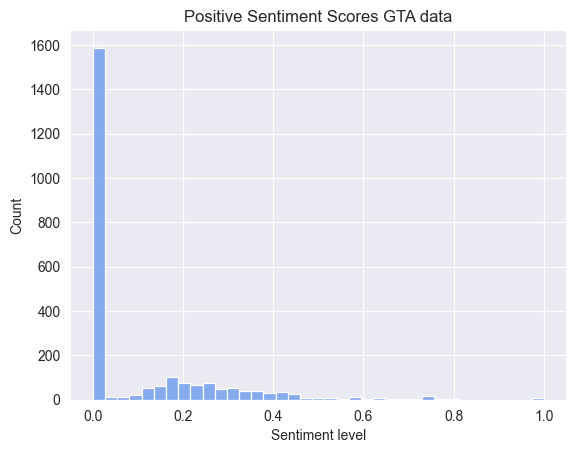

In [744]:
#os.system("pip install seaborn")
#os.system("pip install matplotlib")

# packages used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#pokemon_data["title_sentiment_pos"] = pd.to_numeric(pokemon_data["title_sentiment_pos"], errors = "coerce")
sns.histplot(pokemon_data["title_sentiment_pos"], color = "cornflowerblue").set(title = "Positive Sentiment Scores GTA data", xlabel = "Sentiment level")
# save the plot as png
plt.savefig("sentiment_level_pos.png")

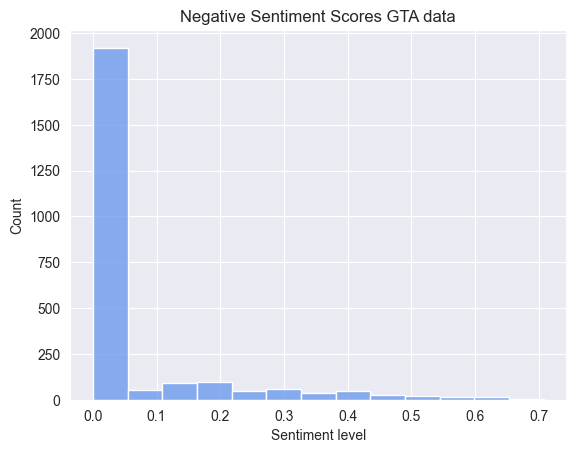

In [745]:
#os.system("pip install seaborn")
#os.system("pip install matplotlib")

# packages used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#pokemon_data["title_sentiment_pos"] = pd.to_numeric(pokemon_data["title_sentiment_pos"], errors = "coerce")
sns.histplot(pokemon_data["title_sentiment_neg"], color = "cornflowerblue").set(title = "Negative Sentiment Scores GTA data", xlabel = "Sentiment level")
# save the plot as png
plt.savefig("sentiment_level_neg.png")

## Word Clouds

In [746]:
#os.system("pip install wordcloud")
#os.system("pip install PIL")

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

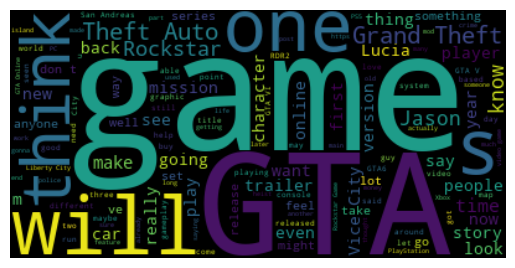

In [747]:
# Combine all Reddit post descriptions into a single string
reddit_text_whole = " ".join(reddit_data["text"].dropna())

# Append the Reddit descriptions to the existing pokemon_text_whole
pokemon_text_whole += " " + reddit_text_whole

# Now you can use pokemon_text_whole to generate the word cloud
wordcloud_pokemon = WordCloud().generate(pokemon_text_whole)

plt.imshow(wordcloud_pokemon, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_raw.png")
plt.show()

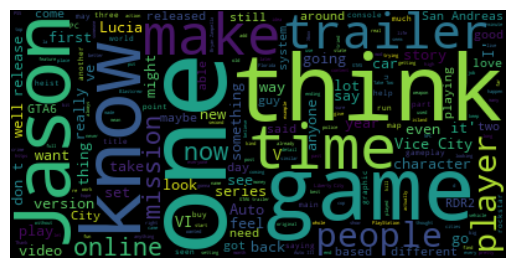

In [748]:
# ok, we get it, its about Pokémon
import re

# Use regular expressions to replace standalone words only
pokemon_text_trimmed = re.sub(r"\bRockstar\b", "", pokemon_text_whole)
pokemon_text_trimmed = re.sub(r"\bgame\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bGrand Theft\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bGTA\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bs\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bgta\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bm\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bu\b", "", pokemon_text_trimmed)
pokemon_text_trimmed = re.sub(r"\bwill\b", "", pokemon_text_trimmed)



# create wordcloud
wordcloud_pokemon_trimmed = WordCloud().generate(pokemon_text_trimmed)

plt.imshow(wordcloud_pokemon_trimmed, interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud_cleaned.png")
plt.show()

Methods like this can be used on any kind of text, which means also the descriptions we extracted before.